In [27]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Util

In [3]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [28]:
def structural_array(structural_element):
    origin = structural_element.shape[0] // 2
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            c.append(((np.subtract([i,j], origin)), structural_element[i,j]))
    return np.array(c)

# Filter

This way of filtering overlaps the filter en the image and ignores all the pixels that exceed the image size. So this handles the bordering as taking only the values that are on valid positions of the image

In [5]:
def filter2d(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            newValue = 0
            for c in struct_array:
                u = np.add([i,j], c[0])
                if within_image(img, u):
                    newValue += c[1]*img[u[0], u[1]] 
            nImg[i, j] = newValue
    return nImg

In [29]:
image = cv2.imread("../Chair.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#_, image = cv2.threshold(image, 100, 120, cv2.THRESH_BINARY)
#image = np.logical_not(image)
image.shape

(425, 425)

# Images

## Original

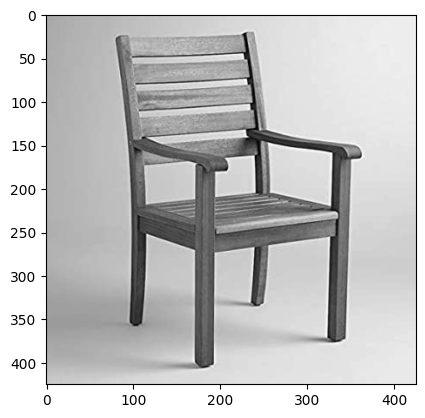

In [30]:
plt.imshow(image, cmap="gray")

## Catching vertical lines

/tmp/ipykernel_7683/773885647.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(c)


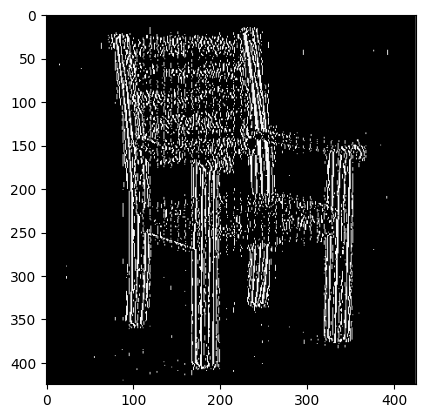

In [31]:
#plt.imshow(filter2d(image, structural_array(np.array([[-1, -1, -1], [3, 3, 3], [-1, -1, -1]]))), cmap="gray")
#plt.imshow(filter2d(image, structural_array(np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]]))), cmap="gray")
plt.imshow(filter2d(image, structural_array(np.array(
    [
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]
    ]
)/10 )), cmap="gray")

## Catching horizontal lines

/tmp/ipykernel_7683/773885647.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(c)


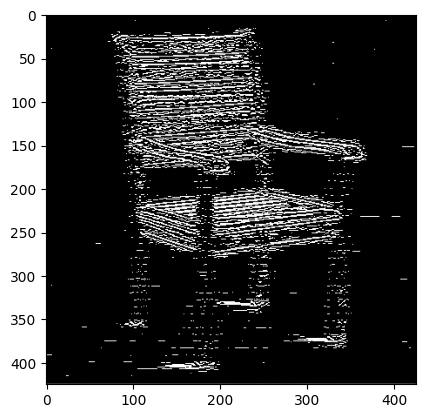

In [32]:
plt.imshow(filter2d(image, structural_array(np.array(
    [
        [-1, -1, -1],
        [2, 2, 2],
        [-1, -1, -1]
    ]
)/10 )), cmap="gray")

## Smoothly catching horizontal lines

/tmp/ipykernel_7683/773885647.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(c)


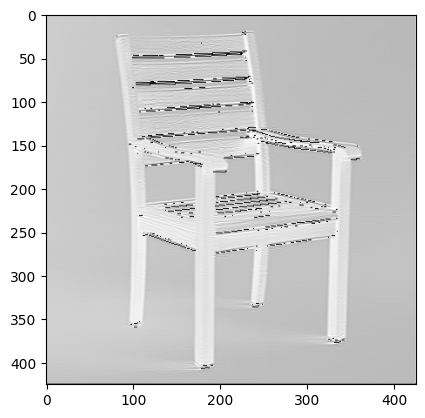

In [34]:
plt.imshow(filter2d(image, structural_array(np.array(
    [
        [-3, -3, -3],
        [5, 5, 5],
        [-3, -3, -3]
    ]
)/10 )), cmap="gray")

## Identity

/tmp/ipykernel_7683/773885647.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(c)


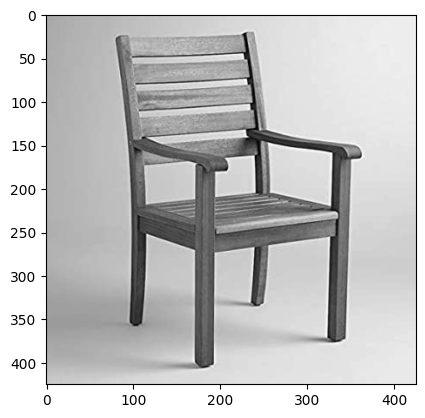

In [26]:
plt.imshow(filter2d(image, structural_array(np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ]
) )), cmap="gray")